In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
tracks_df = pd.read_csv('D:/Python projects/Music_Player/recommendation_system/spotify_genius_track_dataset/Data Sources/spotify_tracks.csv')
tracks_df.head(n=5)

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [13]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

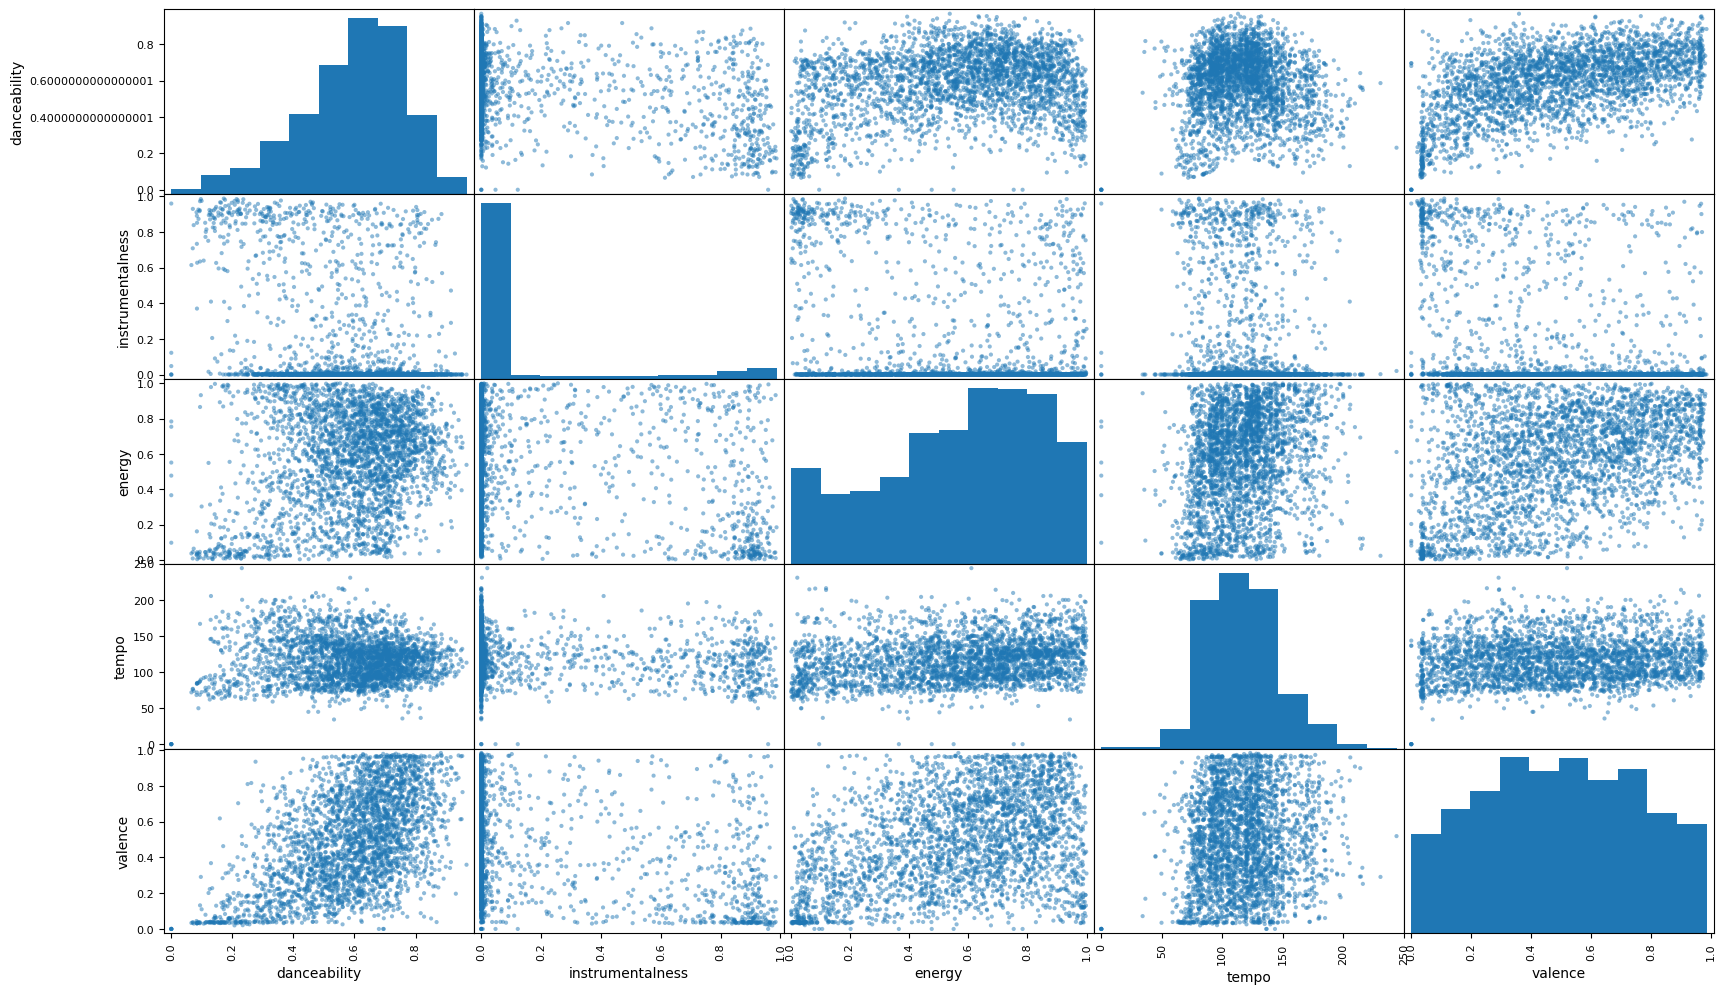

In [14]:
reduced_df = tracks_df[:3000]
pd.plotting.scatter_matrix(reduced_df[['danceability', 'instrumentalness', 'energy', 'tempo', 'valence']], figsize=(20, 12))
plt.show()

In [15]:
reduced_df.corr()

,Unnamed: 0,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
Unnamed: 0,1.000000,0.012274,0.042283,-0.008010,-0.083041,-0.022687,-0.019847,-0.040094,-0.007205,0.004152,-0.000456,0.069131,0.013100,-0.037438,0.008660,0.038893,0.022065
acousticness,0.012274,1.000000,-0.257737,0.071958,0.123352,-0.708448,0.221602,-0.015894,0.033133,-0.616851,0.057907,-0.166793,0.227716,-0.223620,-0.185378,0.184433,-0.258423
danceability,0.042283,-0.257737,1.000000,-0.057591,-0.122472,0.226243,-0.376650,0.053631,-0.030460,0.305238,-0.094647,0.057984,0.189338,-0.023833,0.142243,0.033475,0.538415
disc_number,-0.008010,0.071958,-0.057591,1.000000,0.092998,-0.107349,0.041694,0.045327,-0.011986,-0.108406,0.014833,-0.047711,0.015589,-0.005169,-0.014668,-0.009850,-0.038380
duration_ms,-0.083041,0.123352,-0.122472,0.092998,1.000000,-0.142025,0.108768,-0.021850,-0.044797,-0.212115,0.013124,-0.151808,0.139016,-0.069572,0.002169,-0.085769,-0.144162
energy,-0.022687,-0.708448,0.226243,-0.107349,-0.142025,1.000000,-0.267426,-0.005302,0.138213,0.822972,-0.063451,0.204511,-0.191775,0.228512,0.205129,-0.180219,0.401515
instrumentalness,-0.019847,0.221602,-0.376650,0.041694,0.108768,-0.267426,1.000000,-0.030317,-0.121414,-0.405937,0.029503,0.022565,-0.194413,-0.062026,-0.047800,-0.065940,-0.337544
key,-0.040094,-0.015894,0.053631,0.045327,-0.021850,-0.005302,-0.030317,1.000000,-0.002662,0.017294,-0.152118,-0.014791,-0.011175,0.019120,-0.013088,0.006787,0.066882
liveness,-0.007205,0.033133,-0.030460,-0.011986,-0.044797,0.138213,-0.121414,-0.002662,1.000000,0.034589,-0.005961,-0.076657,0.319874,-0.044882,-0.058222,0.167737,0.042150
loudness,0.004152,-0.616851,0.305238,-0.108406,-0.212115,0.822972,-0.405937,0.017294,0.034589,1.000000,-0.058547,0.283878,-0.298535,0.224001,0.205517,-0.205381,0.352468


In [16]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(tracks_df[['danceability', 'instrumentalness', 'energy', 'tempo', 'valence']])

KMeans(n_clusters=5)

In [21]:
print(kmeans_model.labels_[:10], min(kmeans_model.labels_), max(kmeans_model.labels_))

[0 0 1 0 1 1 1 3 1 1] 0 4


In [22]:
tracks_df['type'] = kmeans_model.labels_
tracks_df.head(n=10)

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,0
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,0
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,1
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,0
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,1
5,5,0.971,7CCwkPweMxKq8yWkVerH6T,https://api.spotify.com/v1/audio-analysis/4PrA...,['3kzwYV3OCB010YfXMF0Avt'],"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",BE,0.367,1.0,183653.0,...,https://p.scdn.co/mp3-preview/10a9607c178fe1ea...,0.0268,81.850,4.0,https://api.spotify.com/v1/tracks/4PrAZpH9Ic7S...,track_23,8.0,spotify:track:4PrAZpH9Ic7S47E78BN6E4,0.1920,1
6,6,0.824,51g5viCaYjOW5XO4qX1RCD,https://api.spotify.com/v1/audio-analysis/1WJz...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.688,1.0,29240.0,...,https://p.scdn.co/mp3-preview/54031f6d3ab4784a...,0.5310,77.056,3.0,https://api.spotify.com/v1/tracks/1WJzRtI1ABzV...,track_9,2.0,spotify:track:1WJzRtI1ABzV3TPIeJZVvi,0.4140,1
7,7,0.719,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/6ile...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.513,1.0,591160.0,...,https://p.scdn.co/mp3-preview/19cc96c529812494...,0.9340,89.024,4.0,https://api.spotify.com/v1/tracks/6ileHaSaGI8U...,track_11,11.0,spotify:track:6ileHaSaGI8UjUK1jQu6jm,0.2280,3
8,8,0.752,1UMRkrYSzqH3tH3yCauNOW,https://api.spotify.com/v1/audio-analysis/6rlE...,"['5uNTrZ1JlKsnpTeFyKWPYO', '3pZ60MK5NPuXtBVJx1...","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.629,1.0,753947.0,...,https://p.scdn.co/mp3-preview/78c5a88b94401f79...,0.9470,85.173,4.0,https://api.spotify.com/v1/tracks/6rlEcNrUCujt...,track_12,6.0,spotify:track:6rlEcNrUCujtmQK0EDvcp2,0.4830,1
9,9,0.690,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/00up...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.529,1.0,573280.0,...,https://p.scdn.co/mp3-preview/38ffa5c3eefab6b8...,0.9380,86.335,4.0,https://api.spotify.com/v1/tracks/00upOxUCEPl1...,track_6,6.0,spotify:track:00upOxUCEPl1CMr1axg52f,0.2140,1


In [23]:
tracks_df.to_csv('D:/Python projects/Music_Player/recommendation_system/spotify_genius_track_dataset/Data Sources/clustered_spotify_tracks.csv')

In [61]:
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
# sample input: 1xK1Gg9SxG8fy2Ya373oqb,1xQ6trAsedVPCdbtDAmk0c,7ytR5pFWmSjzHJIeQkgog4,079Ey5uxL04AKPQgVQwx5h,0lizgQ7Qw35od7CYaoMBZb,7r9ZhitdQBONTFOiJW5mr8,3ee8Jmje8o58CHK66QrVC2,3ZG8N7aWw2meb6UrI5ZmnZ,5cpJFiNwYyWwFLH0V6B3N8,26w9NTiE9NGjW1ZvIOd1So,7BIy3EGQhg98CsRdKYHnJC,2374M0fQpWi3dLnB54qaLX,2IVsRhKrx8hlQBOWy4qebo,40riOy7x9W7GXjyGp4pjAv,4evmHXcjt3bTUHD1cvny97,0MF5QHFzTUM2dYm6J7Vngt,0TrPqhAMoaKUFLR7iYDokf,07KXEDMj78x68D884wgVEm,6gxKUmycQX7uyMwJcweFjp

# search the specified ids in this dataset and get the tracks
favorites = tracks_df[tracks_df.id.isin(ids)]

# code to sort find out the maximum occuring cluster number according to user's favorite track types
cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

# sort the cluster numbers and find out the number which occurs the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# finally get the tracks of that cluster
suggestions = tracks_df[tracks_df.type == user_favorite_cluster]

# now print the first 5 rows of the data frame having that cluster number as their type
print(suggestions.head())

Enter comma-separated ids of your favorite songs
> 16ocos3Q3UA79fKJbalfK4,6RoModa3txoHpxBtJMwnv2,0V4ZrRpuaXTjhSMvMS62R5,1taz71WL8grTxW6JLiL1i8,5CBTQ8PLW3A5puBplpqHyX,6tIrOXJ9vqPy3M1H0Zse5E,0OQLMQBKeaFuA2PJRdMuik,52UWtKlYjZO3dHoRlWuz9S,1OIYK9Ya6EgwJ4fMngrPcK,6hu1f1cXSw7OAqhpSQ2zDy

Favorite cluster: 2 

    Unnamed: 0  acousticness                album_id  \
23          23         0.496  7EaCkqLg2bG0jeAVS0e31v   
36          36         0.494  3Bfh0GI0XMcxzeBBsMH63o   
44          44         0.859  3GHWsz3GsHXxqOpnJN4Zv9   
45          45         0.316  0GJd4LBfN3dlrFpcxH1Dko   
51          51         0.681  5ihcQ3YrAH2Ip9wHUqeQyT   

                                         analysis_url  \
23  https://api.spotify.com/v1/audio-analysis/3pdQ...   
36  https://api.spotify.com/v1/audio-analysis/37GP...   
44  https://api.spotify.com/v1/audio-analysis/4fSy...   
45  https://api.spotify.com/v1/audio-analysis/6lgH...   
51  https://api.spotify.com/v1/audio-analysis/2mLY...   

                

In [62]:
suggestions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11250 entries, 23 to 101935
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11250 non-null  int64  
 1   acousticness       11250 non-null  float64
 2   album_id           11250 non-null  object 
 3   analysis_url       11250 non-null  object 
 4   artists_id         11250 non-null  object 
 5   available_markets  11250 non-null  object 
 6   country            11250 non-null  object 
 7   danceability       11250 non-null  float64
 8   disc_number        11250 non-null  float64
 9   duration_ms        11250 non-null  float64
 10  energy             11250 non-null  float64
 11  href               11250 non-null  object 
 12  id                 11250 non-null  object 
 13  instrumentalness   11250 non-null  float64
 14  key                11250 non-null  float64
 15  liveness           11250 non-null  float64
 16  loudness           1

In [64]:
suggestions[['name', 'id']].loc[suggestions['id'].isin(suggestions['id'].head(n=7))]

,name,id
23,The Looking Glass,3pdQHVnuqHa9cozMlkVmwH
36,The Ant and the Grasshopper,37GP96qj6DYnXn9RKXaYR8
44,Starting Slow,4fSyXvcyQGP86c6BkZyQ2l
45,Te Metiste,6lgHNsNnN2ohPCBPtXwqvI
51,Methhead,2mLYN7Hz2czFkZugFscrrb
68,Trouble,5aGkIyzLVYGuLIHkxpNAFF
70,La muerte chiquita,4JH1M62gVDNDhDAUiQB3Qv


In [65]:
tracks_df[['name', 'id']].loc[tracks_df['name'].isin(['Come As You Are', 'Immigrant Song', 'Heart-Shaped Box', 
                                                      'Ramble On', 'Dazed and Confused', 'Lithium',
                                                      'Smells Like Teen Spirit', 'Thunderstruck', 'Highway to Hell'])]

,name,id
4470,Immigrant Song,16ocos3Q3UA79fKJbalfK4
9598,Smells Like Teen Spirit,6RoModa3txoHpxBtJMwnv2
10738,Smells Like Teen Spirit,3jg5riaamHsO2z6OW82ZUb
14172,Lithium,0V4ZrRpuaXTjhSMvMS62R5
17807,Thunderstruck,1taz71WL8grTxW6JLiL1i8
18222,Come As You Are,5CBTQ8PLW3A5puBplpqHyX
24271,Heart-Shaped Box,6tIrOXJ9vqPy3M1H0Zse5E
43291,Come As You Are,0Oo4kdlTJoX4jxgMEM5exL
57968,Ramble On,0OQLMQBKeaFuA2PJRdMuik
63309,Thunderstruck,52UWtKlYjZO3dHoRlWuz9S
